In [7]:
library(rhdf5)
suppressMessages(library(dplyr))
library(broom)
suppressMessages(library(MASS))
library(ggplot2)

# Load h5 file

In [8]:
h5.path <- "/iblm/netapp/data1/jezhou/crisprQTL/simulated_data_interactions_2guides_power_analysis_01-09-2023/sim.h5"

In [12]:
head(h5ls(h5.path))

group   name              otype       dclass   dim          
0 /       coeffs            H5I_DATASET COMPOUND 13000        
1 /       counts            H5I_GROUP                         
2 /counts lambda100_size0.5 H5I_DATASET INTEGER  13000 x 50000
3 /counts lambda100_size1   H5I_DATASET INTEGER  13000 x 50000
4 /counts lambda100_size3   H5I_DATASET INTEGER  13000 x 50000
5 /counts lambda100_size5   H5I_DATASET INTEGER  13000 x 50000

# Load important info

In [10]:
all.ts.pairs <- h5read(h5.path, "pairs")
lambda.list <- h5read(h5.path, "lambda")
effect.sizes.list <- h5read(h5.path, "effect.sizes")
guide.target.map <- h5read(h5.path, "guides/guide_target_map")
coeffs <- h5read(h5.path, "coeffs")
cell.cycle.scores <- h5read(h5.path, "x/cell_cycle_scores")
percent.mito <- h5read(h5.path, "x/percent_mito")
scaling.factors <- h5read(h5.path, "scaling_factors")

In [11]:
h5read(h5.path, "guides/one_hot")

$`100`
         [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
    [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [2,]    0    0    0    0    0    1    0    0    0     1     1     0     0
    [3,]    0    0    0    1    0    0    0    0    0     0     0     0     0
    [4,]    0    0    0    1    0    1    0    0    0     0     0     0     0
    [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
    [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [13,]    0    0    0    0    0    0    0    0    0     1     0     0     0
   [14,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [15,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [16,]    0    0    0    0    0    0    1    0    0     0     0     1     0
   [17,]    0    0    0    0    0    0    0    0    0     1     0     0     0
   [18,]    0    0    1    0    0    0    0    1    0     0     0     0     0
   [19,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [20,]    0    0    0    0    0    1    0    0    0     0     0     0     0
   [21,]    1    0    0    0    0    1    0    0    0     0     0     0     0
   [22,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [23,]    0    0    0    0    0    0    0    0    0     0     0     1     0
   [24,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [25,]    0    0    0    0    0    0    0    1    0     0     0     0     0
   [26,]    0    1    0    0    0    0    0    0    0     0     0     0     0
   [27,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [28,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [29,]    0    0    1    0    0    0    0    0    0     0     0     0     0
   [30,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [31,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [32,]    0    1    0    0    0    0    0    0    1     0     0     0     0
   [33,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [34,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [35,]    0    0    0    0    0    0    0    0    0     0     1     0     0
   [36,]    1    0    0    0    0    1    0    0    0     0     0     0     0
   [37,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [38,]    0    0    0    0    0    1    0    0    0     0     0     0     0
   [39,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [40,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [41,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [42,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [43,]    0    0    0    0    0    0    0    0    0     1     0     0     0
   [44,]    0    0    0    0    0    1    0    0    0     0     0     0     0
   [45,]    0    0    0    0    0    0    0    0    1     0     0     0     0
   [46,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [47,]    0    0    0    0    0    0    0    0    0     0     0     0     0
   [48,]    0    0    1    0    0    0    0    0    0     0     0     0     0
   [49,]    0    0    0    0    0    0    0    1    0     0     0     0     0
         [,14] [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24]
    [1,]     0    

# Test fitting a model

In [34]:
test.gene <- all.ts.pairs$target.genes[2]
sprintf('test gene = %s', test.gene)

[1] "test gene = 6755"

# Take a closer look at $\lambda=75$

In [35]:
lambda.ix <- which(lambda.list==75)

Load $X_A,X_B,X_{AB}$

In [14]:
xa.mtx <- h5read(h5.path, "x/x_a/75")
xb.mtx <- h5read(h5.path, "x/x_b/75")
xab.mtx <- h5read(h5.path, "x/x_ab/75")

# Load counts matrices

In [15]:
counts.lambda75.size3 <- h5read(h5.path, "counts/lambda75_size3")
# counts.lambda75.size7 <- h5read(h5.path, "counts/lambda75_size7")

In [36]:
size3.target.counts <- counts.lambda75.size3[test.gene,]
# size7.target.counts <- counts.lambda75.size7[test.gene,]

In [37]:
length(size3.target.counts)

[1] 50000

# Model

### $\beta_{AB}=3$

In [38]:
gene.data.size3 <- data.frame(tsA = xa.mtx[test.gene,],
                              tsB = xb.mtx[test.gene,],
                              tsAB = xab.mtx[test.gene,],
                              s.score = cell.cycle.scores$s.scores,
                              g2m.score = cell.cycle.scores$g2m.scores,
                              percent.mito = percent.mito,
                              counts = size3.target.counts,
                              scaling.factor = scaling.factors)

In [56]:
alt.size3 <- glm.nb(counts ~ tsA * tsB + s.score + g2m.score + percent.mito + offset(log(scaling.factor)),
                   data = gene.data.size3, link = 'identity')


Warning message in log(y/mu):
“NaNs produced”


ERROR: Error: no valid set of coefficients has been found: please supply starting values


In [51]:
alt.size3.brm <- broom::tidy(alt.size3)

In [52]:
alt.size3.brm

term         estimate  std.error   statistic  p.value     
1 (Intercept)   5.457381 0.008507163  641.50420 0.000000e+00
2 tsA          -2.004170 0.026918790  -74.45245 0.000000e+00
3 tsB          -3.313808 0.030207157 -109.70275 0.000000e+00
4 s.score       2.981186 0.036509755   81.65450 0.000000e+00
5 g2m.score     2.285831 0.020420120  111.94015 0.000000e+00
6 percent.mito  3.717831 0.188563992   19.71655 1.554786e-86
7 tsA:tsB       2.990157 0.170490288   17.53858 7.272527e-69

In [55]:
alt.size3$aic

[1] 336444.3

# How many cells have both pairs perturbed for each value of $\lambda$?

In [ ]:
na.list <- list()
nb.list <- list()
nab.list <- list()
i <- 1

for (lambda in lambda.list) {
    print(lambda)
    xa.mtx <- h5read(h5.path, paste0("x/x_a/", lambda))
    xb.mtx <- h5read(h5.path, paste0("x/x_b/", lambda))
    xab.mtx <- h5read(h5.path, paste0("x/x_ab/", lambda))
    
    na <- apply(xa.mtx[all.ts.pairs %>% filter(set=='positive') %>% pull(target.genes),],
               1, function(x) {length(which(x!=0))})
    nb <- apply(xb.mtx[all.ts.pairs %>% filter(set=='positive') %>% pull(target.genes),],
               1, function(x) {length(which(x!=0))})
    nab <- apply(xab.mtx[all.ts.pairs %>% filter(set=='positive') %>% pull(target.genes),],
               1, function(x) {length(which(x!=0))})
    
    na <- na - nab
    nb <- nb - nab
    
    na.list[[i]] <- na
    nb.list[[i]] <- nb
    nab.list[[i]] <- nab
    
    i <- i + 1
   
}

In [ ]:
nab.df <- data.frame(nab.list)
colnames(nab.df) <- lambda.list
nab.df$enhancers <- "A+B"

na.df <- data.frame(na.list)
colnames(na.df) <- lambda.list
na.df$enhancers <- "A"

nb.df <- data.frame(nb.list)
colnames(nb.df) <- lambda.list
nb.df$enhancers <- "B"

In [ ]:
ncells.with.grnas.plotdf <- do.call(rbind, list(nab.df, na.df, nb.df)) %>% 
                            tidyr::pivot_longer(-enhancers, names_to = "lambda", values_to = "ncells")

In [ ]:
head(ncells.with.grnas.plotdf)

In [ ]:
ncells.with.grnas.plotdf %>% group_by(lambda, enhancers) %>% summarise(mean_cells = mean(ncells),
                                                                      median_cells = median(ncells),
                                                                      max_cells = max(ncells),
                                                                      min_cells = min(ncells))

In [ ]:
ncells.with.grnas.plotdf$enhancers <- factor(ncells.with.grnas.plotdf$enhancers, 
                                             levels = c("A","B","A+B"))
ncells.with.grnas.plotdf$lambda <- factor(ncells.with.grnas.plotdf$lambda, 
                                             levels = c(15, 25, 50, 75, 100))

In [ ]:
ggplot(ncells.with.grnas.plotdf, aes(x = ncells)) + geom_histogram() + 
    facet_wrap(vars(enhancers, lambda), scales = "free", ncol = 5)
#     facet_grid(cols = vars(lambda), rows = vars(enhancers), scales = "free")

In [21]:
pdf("../histogram_cells_with_perturbed_enhancers_grid.pdf", width = 13, height = 7)

print(
ggplot(ncells.with.grnas.plotdf, aes(x = ncells)) + geom_histogram() + 
    facet_wrap(vars(enhancers, lambda), scales = "free", ncol = 5)
)

dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



png 
  2

# Check counts for positive pair target genes for $\lambda=50$ and $\beta_{AB}=5$

In [7]:
lambda50_effect5 <- h5read(h5.path, "counts/lambda50_size5")

In [8]:
pos.genes <- all.ts.pairs %>% filter(set == "positive") %>% pull(target.genes)

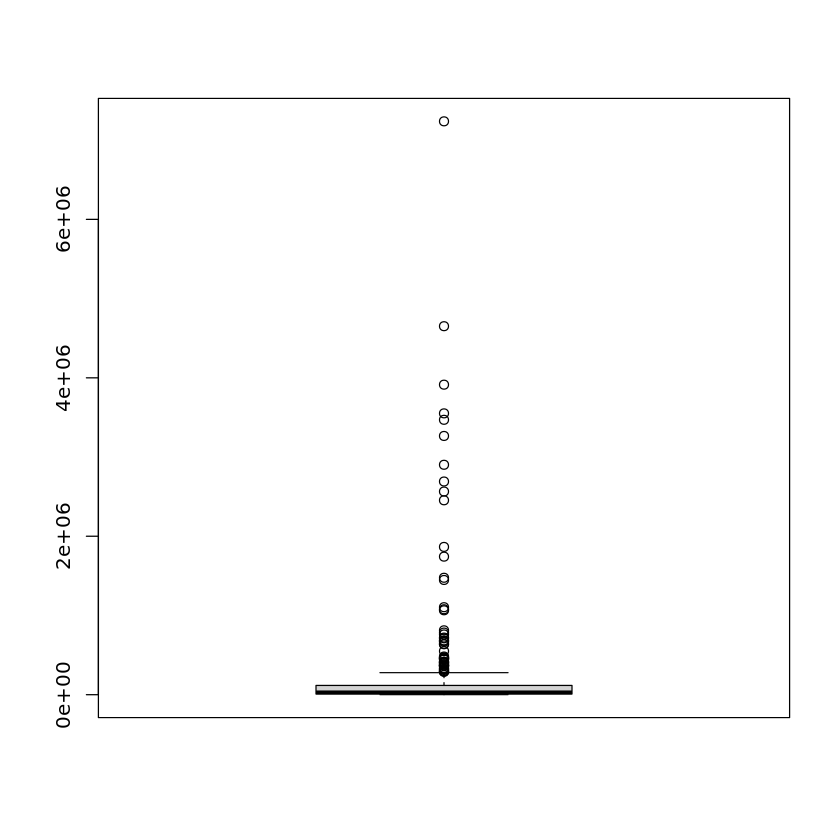

In [9]:
boxplot(rowSums(lambda50_effect5[pos.genes,]))

# Check counts for positive pair target genes for $\lambda=50$ and $\beta_{AB}=3$

In [10]:
lambda50_effect3 <- h5read(h5.path, "counts/lambda50_size3")

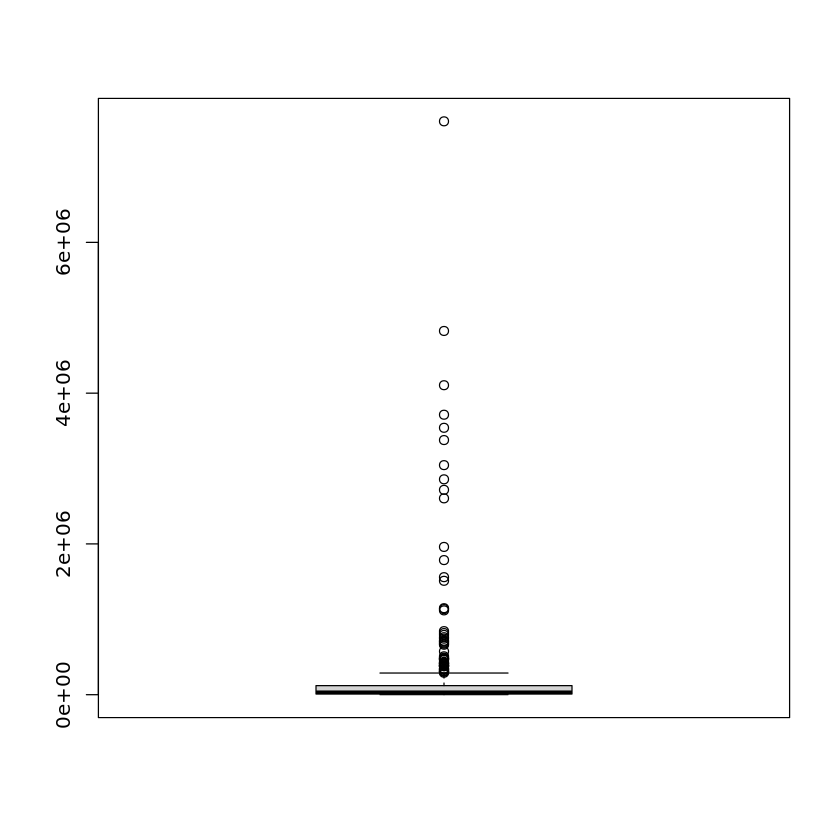

In [11]:
boxplot(rowSums(lambda50_effect3[pos.genes,]))

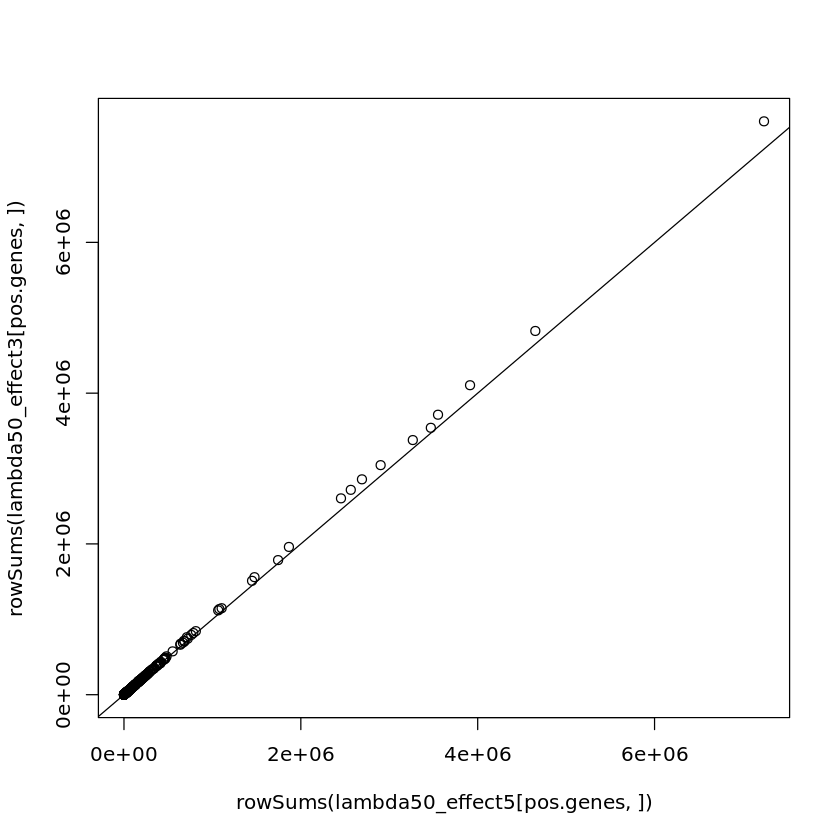

In [12]:
plot(rowSums(lambda50_effect5[pos.genes,]), rowSums(lambda50_effect3[pos.genes,]))
abline(0,1)

In [13]:
summary(rowSums(lambda50_effect5[pos.genes,]) - rowSums(lambda50_effect3[pos.genes,]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-367979   -4824   -1212   -7725    -345      82 

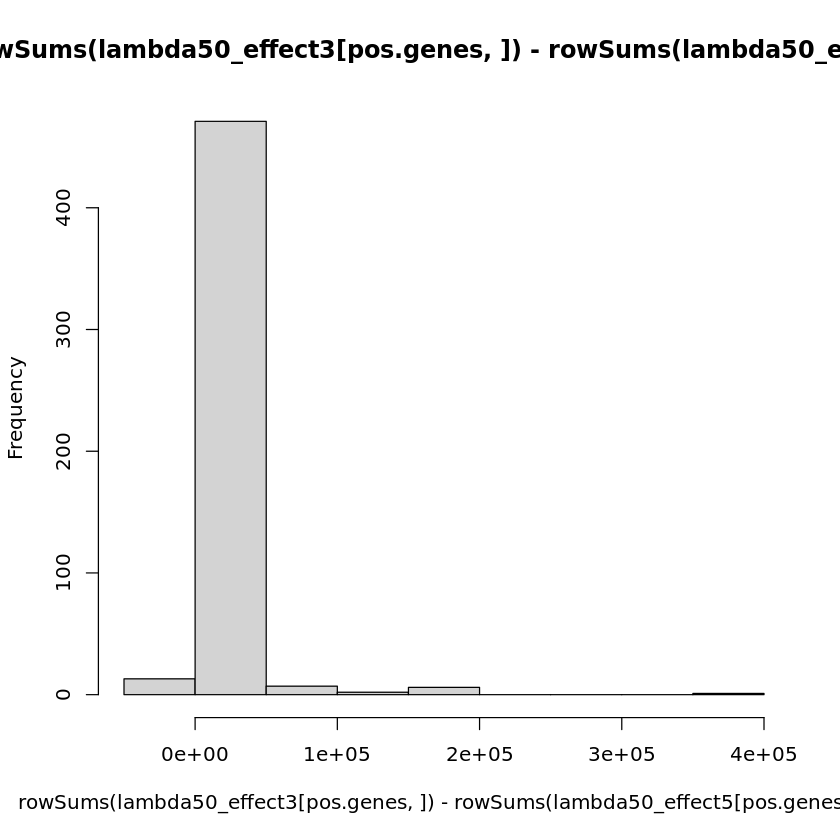

In [14]:
hist(rowSums(lambda50_effect3[pos.genes,]) - rowSums(lambda50_effect5[pos.genes,]))

# Check counts for positive pair target genes for $\lambda=50$ and $\beta_{AB}=7$

In [15]:
lambda50_effect7 <- h5read(h5.path, "counts/lambda50_size7")

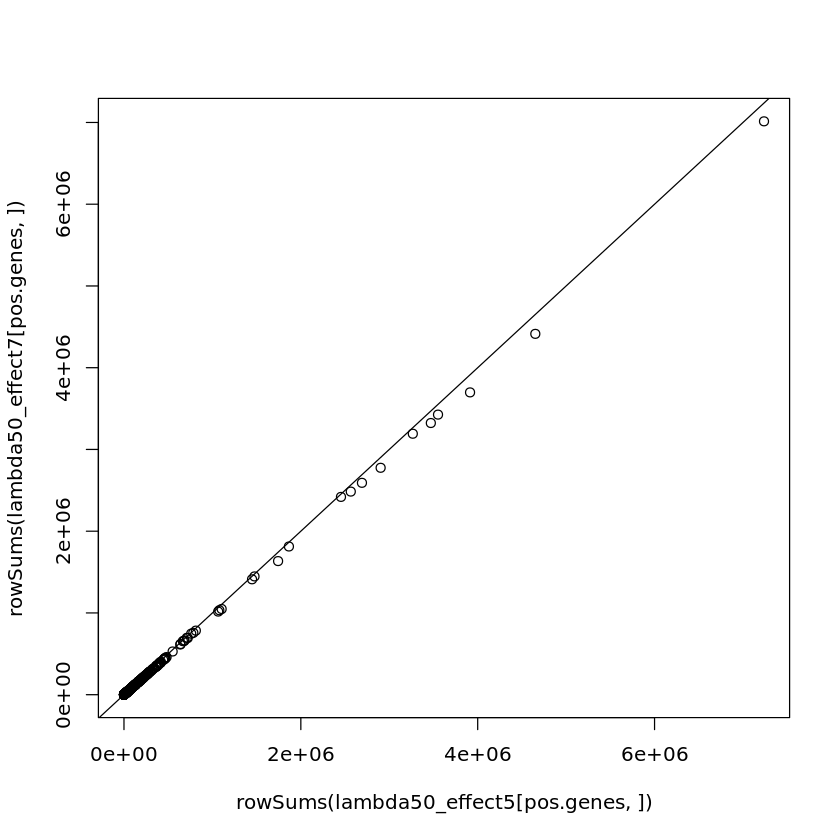

In [16]:
plot(rowSums(lambda50_effect5[pos.genes,]), rowSums(lambda50_effect7[pos.genes,]))
abline(0,1)

# Load fitted models

In [17]:
alt.mods.files <- list.files("/iblm/netapp/data1/jezhou/crisprQTL/power_analysis_12-12-2022",
                      pattern = "tidy_alt.rds", full.names = T)

alt.mods <- lapply(alt.mods.files, readRDS)

In [18]:
alt.mods

[[1]]
[[1]][[1]]
# A tibble: 3,500 × 5
   term         estimate std.error statistic   p.value
   <chr>           <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept)     2.56    0.0147    174.    0        
 2 tsA            -2.47    0.0526    -47.0   0        
 3 tsB            -7.05    0.249     -28.3   2.26e-176
 4 s.score         6.67    0.0649    103.    0        
 5 g2m.score       2.56    0.0321     79.7   0        
 6 percent.mito    3.76    0.316      11.9   1.29e- 32
 7 tsA:tsB         0.794   1.95        0.407 6.84e-  1
 8 (Intercept)     6.42    0.00821   781.    0        
 9 tsA            -1.38    0.0246    -56.3   0        
10 tsB            -4.95    0.0302   -164.    0        
# … with 3,490 more rows
# ℹ Use `print(n = ...)` to see more rows

[[1]][[2]]
# A tibble: 3,500 × 5
   term         estimate  std.error statistic   p.value
   <chr>           <dbl>      <dbl>     <dbl>     <dbl>
 1 (Intercept)      2.57    0.0147   175.     0        
 2 tsA             -2.61    0.0550   -47.5    0        
 3 tsB             -7.28    0.267    -27.2    3.26e-163
 4 s.score          6.67    0.0646   103.     0        
 5 g2m.score        2.52    0.0321    78.7    0        
 6 percent.mito     3.98    0.315     12.7    1.04e- 36
 7 tsA:tsB        -27.5  1699.        -0.0162 9.87e-  1
 8 (Intercept)      6.41    0.00830  772.     0        
 9 tsA             -1.36    0.0248   -54.7    0        
10 tsB             -4.91    0.0303  -162.     0        
# … with 3,490 more rows
# ℹ Use `print(n = ...)` to see more rows

[[1]][[3]]
# A tibble: 3,500 × 5
   term         estimate std.error statistic   p.value
   <chr>           <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept)      2.59   0.0146     178.   0        
 2 tsA             -2.47   0.0523     -47.3  0        
 3 tsB             -7.04   0.247      -28.5  5.51e-179
 4 s.score          6.64   0.0643     103.   0        
 5 g2m.score        2.52   0.0319      79.0  0        
 6 percent.mito     3.49   0.314       11.1  1.23e- 28
 7 tsA:tsB          4.50   0.729        6.17 6.87e- 10
 8 (Intercept)      6.42   0.00831    772.   0        
 9 tsA             -1.35   0.0248     -54.6  0        
10 tsB             -4.91   0.0302    -163.   0        
# … with 3,490 more rows
# ℹ Use `print(n = ...)` to see more rows

[[1]][[4]]
# A tibble: 3,500 × 5
   term         estimate std.error statistic   p.value
   <chr>           <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept)      2.57   0.0148     174.   0        
 2 tsA             -2.43   0.0519     -46.8  0        
 3 tsB             -7.44   0.283      -26.3  1.87e-152
 4 s.score          6.58   0.0650     101.   0        
 5 g2m.score        2.59   0.0323      80.1  0        
 6 percent.mito     3.85   0.317       12.1  7.37e- 34
 7 tsA:tsB          4.91   0.752        6.53 6.49e- 11
 8 (Intercept)      6.41   0.00828    774.   0        
 9 tsA             -1.35   0.0247     -54.6  0        
10 tsB             -4.80   0.0297    -162.   0        
# … with 3,490 more rows
# ℹ Use `print(n = ...)` to see more rows

[[1]][[5]]
# A tibble: 3,500 × 5
   term         estimate std.error statistic   p.value
   <chr>           <dbl>     <dbl>     <dbl>     <dbl>
 1 (Intercept)      2.56   0.0148      173.  0        
 2 tsA             -2.56   0.0542      -47.3 0        
 3 tsB             -7.44   0.281       -26.4 4.62e-154
 4 s.score          6.56   0.0649      101.  0        
 5 g2m.score        2.55   0.0323       78.9 0        
 6 percent.mito     4.35   0.316        13.8 3.58e- 43
 7 tsA:tsB          7.63   0.468        16.3 1.41e- 59
 8 (Intercept)      6.42   0.00828     775.  0        
 9 tsA             -1.39   0.0247      -56.1 0        
10 tsB             -4.93   0.0302     -163.  0        
# … with 3,490 more rows
# ℹ Use `print(n = ...)` to see more rows


[[2]]
[[2]][[1]]
# A tibble: 3,500 × 5
   term         estimate  std.error statistic   p.value
   <chr>           <dbl>      <dbl>     <dbl>     <dbl>
 1 (Intercept)      2.59 

# Take a closer look at $\lambda=75$

In [21]:
lambda.ix <- which(lambda.list==75)

Load $X_A,X_B,X_{AB}$

In [22]:
xa.mtx <- h5read(h5.path, "x/x_a/75")
xb.mtx <- h5read(h5.path, "x/x_b/75")
xab.mtx <- h5read(h5.path, "x/x_ab/75")

### Compare $\beta_{AB}=7$ to $\beta_{AB}=3$

Specifically, look for examples of genes that are significant for smaller effect size but insignificant for larger effect size.

In [23]:
size7.lambda75.res <- alt.mods[[lambda.ix]][[which(effect.sizes.list==7)]] 
size7.lambda75.res$gene <- rep(all.ts.pairs %>% filter(set == "positive") %>% pull(target.genes), each=7)
size7.lambda75.res$size <- 7
head(size7.lambda75.res)

term         estimate    std.error  statistic   p.value      gene size
1 (Intercept)   2.39692289 0.01573499 152.3307172 0.000000e+00 8005 7   
2 tsA           0.03069421 0.04055363   0.7568794 4.491221e-01 8005 7   
3 tsB          -0.01396144 0.04729386  -0.2952061 7.678364e-01 8005 7   
4 s.score       6.64669079 0.06928785  95.9286581 0.000000e+00 8005 7   
5 g2m.score     2.49596010 0.03469727  71.9353546 0.000000e+00 8005 7   
6 percent.mito  3.63869201 0.33864032  10.7450052 6.255843e-27 8005 7

In [24]:
size7.lambda75.res %>% filter(term=="tsA:tsB" & p.value<0.05)

term    estimate   std.error statistic p.value    gene  size
1  tsA:tsB  1.9159623 0.8183333  2.341298 0.01921682  9922 7   
2  tsA:tsB -0.8209901 0.3692916 -2.223148 0.02620581  2171 7   
3  tsA:tsB  0.8406164 0.4033054  2.084317 0.03713135 12767 7   
4  tsA:tsB -0.5086542 0.2490508 -2.042371 0.04111473  7037 7   
5  tsA:tsB  1.7316238 0.7754069  2.233181 0.02553703  5356 7   
6  tsA:tsB  0.6979998 0.3422795  2.039268 0.04142326  6633 7   
7  tsA:tsB -1.3543120 0.5609684 -2.414239 0.01576809 12008 7   
8  tsA:tsB -1.1525780 0.4818514 -2.391978 0.01675785  8747 7   
9  tsA:tsB -0.6374287 0.3213046 -1.983877 0.04726960  1614 7   
10 tsA:tsB -0.7496179 0.3534191 -2.121045 0.03391799  6563 7   
11 tsA:tsB -1.8511064 0.7893119 -2.345215 0.01901609 10011 7   
12 tsA:tsB -2.9523749 1.1833264 -2.494979 0.01259645 12402 7

In [25]:
size3.lambda75.res <- alt.mods[[lambda.ix]][[which(effect.sizes.list==3)]]
size3.lambda75.res$gene <- rep(all.ts.pairs %>% filter(set == "positive") %>% pull(target.genes), each=7)
size3.lambda75.res$size <- 3
head(size3.lambda75.res)

term         estimate  std.error  statistic p.value       gene size
1 (Intercept)   2.582315 0.01404137 183.90769  0.000000e+00 8005 3   
2 tsA          -2.291202 0.06668394 -34.35913 1.029103e-258 8005 3   
3 tsB          -7.243493 0.34668536 -20.89356  6.127078e-97 8005 3   
4 s.score       6.582864 0.06201983 106.14127  0.000000e+00 8005 3   
5 g2m.score     2.559652 0.03077792  83.16521  0.000000e+00 8005 3   
6 percent.mito  3.863727 0.30286180  12.75739  2.835304e-37 8005 3

In [26]:
size3.lambda75.res %>% filter(term == "tsA:tsB" & p.value<0.05)

term    estimate std.error statistic p.value       gene  size
1   tsA:tsB 3.578300 0.2989514 11.969504  5.133435e-33 11610 3   
2   tsA:tsB 2.923408 0.3978860  7.347352  2.021719e-13 12825 3   
3   tsA:tsB 3.064578 0.5442496  5.630833  1.793418e-08  8451 3   
4   tsA:tsB 3.290560 0.6206364  5.301912  1.145959e-07 12096 3   
5   tsA:tsB 3.086697 0.2354828 13.107950  2.965031e-39  8758 3   
6   tsA:tsB 5.423710 1.3459766  4.029572  5.587850e-05  7487 3   
7   tsA:tsB 4.118837 0.9251689  4.451984  8.508039e-06 10520 3   
8   tsA:tsB 3.162664 0.2491182 12.695435  6.268081e-37  1835 3   
9   tsA:tsB 3.070358 0.2820457 10.886031  1.343699e-27  5995 3   
10  tsA:tsB 3.474727 0.6782718  5.122912  3.008535e-07  1338 3   
11  tsA:tsB 2.985461 0.6676538  4.471570  7.764735e-06  2923 3   
12  tsA:tsB 2.844081 0.5759627  4.937960  7.894419e-07 11662 3   
13  tsA:tsB 3.675303 0.8804052  4.174559  2.985641e-05   334 3   
14  tsA:tsB 2.971206 0.1301541 22.828360 2.397860e-115  4964 3   
15  tsA:tsB 3.798816 0.2905989 13.072369  4.736725e-39   499 3   
16  tsA:tsB 3.573110 0.3241047 11.024554  2.909567e-28 12722 3   
17  tsA:tsB 2.322441 1.0217721  2.272954  2.302895e-02  4573 3   
18  tsA:tsB 2.156246 0.7415361  2.907810  3.639695e-03  6005 3   
19  tsA:tsB 2.852018 0.3455699  8.253087  1.543552e-16 10056 3   
20  tsA:tsB 2.852962 1.2525650  2.277696  2.274471e-02  3515 3   
21  tsA:tsB 3.379260 0.2926078 11.548772  7.488248e-31  6320 3   
22  tsA:tsB 2.976598 0.6023431  4.941699  7.744463e-07 11334 3   
23  tsA:tsB 2.618582 0.7813666  3.351285  8.043739e-04 11511 3   
24  tsA:tsB 3.315055 0.4790969  6.919382  4.536168e-12 11026 3   
25  tsA:tsB 3.169059 0.2440991 12.982671  1.534348e-38 12488 3   
26  tsA:tsB 3.052534 0.2985876 10.223243  1.560322e-24  2428 3   
27  tsA:tsB 3.180274 0.3450012  9.218153  3.022616e-20 12869 3   
28  tsA:tsB 3.401158 0.5048583  6.736857  1.618494e-11  3351 3   
29  tsA:tsB 3.312053 0.7426231  4.459938  8.198344e-06  8601 3   
30  tsA:tsB 3.093540 0.2741908 11.282434  1.602496e-29  5444 3   
⋮   ⋮       ⋮        ⋮         ⋮         ⋮             ⋮     ⋮   
306 tsA:tsB 3.239812 0.3438834  9.421251 4.457457e-21   2688 3   
307 tsA:tsB 2.587709 0.3798531  6.812395 9.598729e-12   1600 3   
308 tsA:tsB 3.699752 1.4289056  2.589221 9.619344e-03   9239 3   
309 tsA:tsB 3.648934 0.4728119  7.717517 1.186177e-14   6549 3   
310 tsA:tsB 2.845976 0.2751975 10.341577 4.569552e-25    587 3   
311 tsA:tsB 2.967475 0.4521940  6.562393 5.295091e-11   3777 3   
312 tsA:tsB 3.213860 0.2008456 16.001644 1.244458e-57  10892 3   
313 tsA:tsB 3.117425 0.4448543  7.007743 2.421926e-12   5335 3   
314 tsA:tsB 4.125189 1.3259974  3.111008 1.864496e-03   1400 3   
315 tsA:tsB 2.841232 0.2444798 11.621542 3.203033e-31   2580 3   
316 tsA:tsB 2.755777 0.2797589  9.850543 6.817448e-23   6557 3   
317 tsA:tsB 3.605149 0.4515218  7.984442 1.411597e-15   1157 3   
318 tsA:tsB 3.785806 0.4017736  9.422735 4.394862e-21   1634 3   
319 tsA:tsB 3.492720 0.5249092  6.653950 2.853302e-11  11224 3   
320 tsA:tsB 3.747895 0.8087762  4.634032 3.586116e-06  11202 3   
321 tsA:tsB 2.796736 0.7244667  3.860407 1.131983e-04   2939 3   
322 tsA:tsB 2.631821 0.6087295  4.323465 1.535976e-05   6870 3   
323 tsA:tsB 3.225100 0.8169419  3.947771 7.888207e-05   7856 3   
324 tsA:tsB 2.850080 0.3296457  8.645887 5.338873e-18   1456 3   
325 tsA:tsB 1.692540 0.7632841  2.217445 2.659271e-02  12368 3   
326 tsA:tsB 3.983277 0.5386693  7.394661 1.417693e-13   6969 3   
327 tsA:tsB 2.158091 0.4739937  4.552996 5.288738e-06   8709 3   
328 tsA:tsB 4.661749 1.2864122  3.623837 2.902641e-04   3639 3   
329 tsA:tsB 3.311070 0.5509411  6.009844 1.857017e-09   3733 3   
330 tsA:tsB 2.782467 0.5146356  5.406675 6.420552e-08  11058 3   
331 tsA:tsB 2.940483 0.2369665 12.408854 2.339771e-35   1840 3   
332 tsA:tsB 2.791916 0.4096212  6.815850 9.370821e-12   2425 3   
333 tsA:tsB 4.501819 1.6180241  2.782294 5.397609e-03   7650 3   
334 tsA:tsB 3.458512 0.9001682  3.842074 1.2

In [27]:
comparison.table <- size3.lambda75.res %>% left_join(size7.lambda75.res, by = c("term", 'gene'), suffix = c("_size3", "_size7"))
head(comparison.table)

term         estimate_size3 std.error_size3 statistic_size3 p.value_size3
1 (Intercept)   2.582315      0.01404137      183.90769        0.000000e+00
2 tsA          -2.291202      0.06668394      -34.35913       1.029103e-258
3 tsB          -7.243493      0.34668536      -20.89356        6.127078e-97
4 s.score       6.582864      0.06201983      106.14127        0.000000e+00
5 g2m.score     2.559652      0.03077792       83.16521        0.000000e+00
6 percent.mito  3.863727      0.30286180       12.75739        2.835304e-37
  gene size_size3 estimate_size7 std.error_size7 statistic_size7 p.value_size7
1 8005 3           2.39692289    0.01573499      152.3307172     0.000000e+00 
2 8005 3           0.03069421    0.04055363        0.7568794     4.491221e-01 
3 8005 3          -0.01396144    0.04729386       -0.2952061     7.678364e-01 
4 8005 3           6.64669079    0.06928785       95.9286581     0.000000e+00 
5 8005 3           2.49596010    0.03469727       71.9353546     0.000000e+00 
6 8005 3           3.63869201    0.33864032       10.7450052     6.255843e-27 
  size_size7
1 7         
2 7         
3 7         
4 7         
5 7         
6 7

In [28]:
dim(comparison.table)

[1] 3500   12

Pull out cases where $\hat{\beta}_{AB}$ is significant for ground truth $\beta_{AB}=3$ but insignificant for ground truth $\beta_{AB}=7$

In [29]:
opp.cases <- comparison.table %>% filter(p.value_size3<=0.05 & p.value_size7>0.05) %>% 
                    filter(term=="tsA:tsB")

head(opp.cases)

term    estimate_size3 std.error_size3 statistic_size3 p.value_size3 gene 
1 tsA:tsB 3.578300       0.2989514       11.969504       5.133435e-33  11610
2 tsA:tsB 2.923408       0.3978860        7.347352       2.021719e-13  12825
3 tsA:tsB 3.064578       0.5442496        5.630833       1.793418e-08   8451
4 tsA:tsB 3.290560       0.6206364        5.301912       1.145959e-07  12096
5 tsA:tsB 3.086697       0.2354828       13.107950       2.965031e-39   8758
6 tsA:tsB 5.423710       1.3459766        4.029572       5.587850e-05   7487
  size_size3 estimate_size7 std.error_size7 statistic_size7 p.value_size7
1 3           0.293312996   0.3011713        0.973907549    0.3301024    
2 3          -0.307890872   0.2378767       -1.294329531    0.1955516    
3 3          -0.308757465   0.3103437       -0.994888767    0.3197904    
4 3           0.269320505   0.3288780        0.818907083    0.4128394    
5 3          -0.319990451   0.2086658       -1.533506714    0.1251511    
6 3          -0.002328831   0.6853435       -0.003398049    0.9972888    
  size_size7
1 7         
2 7         
3 7         
4 7         
5 7         
6 7

In [30]:
dim(opp.cases)[1]

[1] 327

Pull out cases where $\hat{\beta}_{AB}$ is significant for ground truth $\beta_{AB}=3$ and $\beta_{AB}=7$

In [31]:
same.cases <- comparison.table %>% filter(p.value_size3<=0.05 & p.value_size7<=0.05) %>% 
                    filter(term=="tsA:tsB")

head(same.cases)

term    estimate_size3 std.error_size3 statistic_size3 p.value_size3 gene 
1 tsA:tsB 7.251389       1.8230978       3.977510        6.964082e-05   9922
2 tsA:tsB 2.708502       0.5992316       4.519958        6.185189e-06   2171
3 tsA:tsB 3.150027       0.3761990       8.373299        5.602729e-17   7037
4 tsA:tsB 4.014332       0.4373276       9.179233        4.341747e-20   6633
5 tsA:tsB 2.650375       0.8283864       3.199443        1.376932e-03  12008
6 tsA:tsB 4.861117       1.2152083       4.000234        6.327994e-05   8747
  size_size3 estimate_size7 std.error_size7 statistic_size7 p.value_size7
1 3           1.9159623     0.8183333        2.341298       0.01921682   
2 3          -0.8209901     0.3692916       -2.223148       0.02620581   
3 3          -0.5086542     0.2490508       -2.042371       0.04111473   
4 3           0.6979998     0.3422795        2.039268       0.04142326   
5 3          -1.3543120     0.5609684       -2.414239       0.01576809   
6 3          -1.1525780     0.4818514       -2.391978       0.01675785   
  size_size7
1 7         
2 7         
3 7         
4 7         
5 7         
6 7

In [32]:
dim(same.cases)[1]

[1] 8

### Calculate MSE for $\hat{\beta}_{AB}$ for $\beta_{AB}=3$ and $\beta_{AB}=7$ for opposite cases

In [33]:
mean((opp.cases$estimate_size3-3)^2)

[1] 1.447874

In [34]:
mean((opp.cases$estimate_size7-7)^2)

[1] 49.78908

# Test problematic cases

In [35]:
opp.cases$gene[1:5]

[1] 11610 12825  8451 12096  8758

In [36]:
test.gene <- opp.cases$gene[1]
print(paste("test gene =", test.gene))

[1] "test gene = 11610"


In [37]:
filter(all.ts.pairs, target.genes == test.gene)

tsA tsB target.genes betaA    betaB     set     
1 99  431 11610        -1.35887 -4.880112 positive

**How many cells have guides for both enhancers on this gene?**

In [38]:
length(which(xab.mtx[test.gene,]!=0))

[1] 277

In [39]:
which(xab.mtx[test.gene,]!=0)

[1]   106   225   401   730   742  1096  1186  1511  1636  1832  1864  1928
 [13]  2021  2032  2540  2736  2916  3030  3238  3441  3564  3637  4120  4132
 [25]  4203  4387  4457  4652  4813  4814  5162  5491  5810  5916  6084  6579
 [37]  6594  6768  6813  7050  7709  7727  7757  7810  7879  7935  8015  8042
 [49]  8114  8185  8236  8247  9017  9294  9868 10092 10175 10292 10468 10616
 [61] 10917 11119 11346 11469 11499 11500 11732 12201 12315 12321 12606 12682
 [73] 12708 13139 13447 13471 13486 13677 13732 13986 14292 14691 14810 14859
 [85] 15286 15683 15853 16451 16691 16913 17002 17227 17360 17647 18059 18143
 [97] 18144 18442 18570 18649 18743 18883 18962 19596 19765 19855 20138 20325
[109] 20823 20909 21038 21076 21277 21340 21631 21976 22093 22246 22269 22408
[121] 22433 22887 23060 23202 23221 23409 23677 23795 23801 24196 24542 24699
[133] 24842 24865 25032 25078 25203 25277 25429 25535 25577 25792 25830 26074
[145] 26336 26344 26359 26384 26439 26502 26829 26852 26985 27032 27044 27278
[157] 28074 28104 28341 28497 28553 28809 28860 29026 29066 29286 29757 29820
[169] 30539 30616 30711 31276 31347 31381 31913 31953 32036 32084 32287 32589
[181] 32705 32713 32730 32936 33148 33179 33211 33245 33315 33572 33636 33683
[193] 33999 34598 34849 35022 35119 35444 35606 35704 35797 35898 36063 36319
[205] 36324 36478 36618 36736 36848 36942 37498 37570 37649 37994 38069 38082
[217] 38406 38627 38649 38681 38733 38738 38753 39396 39637 39902 40484 40596
[229] 40834 41175 41349 41508 41982 42146 42523 43250 43321 43342 43567 43603
[241] 43800 43951 44293 44359 44599 44879 44998 45221 45355 45392 45666 45769
[253] 45783 45915 46295 46453 46610 46719 46817 46902 47005 47141 47214 47462
[265] 47710 47787 47973 48163 48829 48894 49145 49193 49433 49571 49680 49778
[277] 49908

# Load counts matrices

In [40]:
counts.lambda75.size3 <- h5read(h5.path, "counts/lambda75_size3")
counts.lambda75.size7 <- h5read(h5.path, "counts/lambda75_size7")

In [41]:
size3.target.counts <- counts.lambda75.size3[test.gene,]
size7.target.counts <- counts.lambda75.size7[test.gene,]

In [42]:
length(size3.target.counts)

[1] 50000

In [43]:
# make vectors that record which cell has guides targeting both 
target.case.ix <- rep(FALSE,length(size3.target.counts))
target.case.ix[which(xab.mtx[test.gene,]!=0)] <- TRUE

In [44]:
# plotdf <- data.frame(ix = rep(1:length(size3.target.counts),2),
#            counts = c(size3.target.counts,
#                      size7.target.counts),
#           target.cell = rep(target.case.ix,2),
#           effect.size = c(rep(3, length(size3.target.counts)),
#                          rep(7, length(size7.target.counts))))

plotdf <- data.frame(counts3 = size3.target.counts,
                    counts7 = size7.target.counts,
                    target.cell = target.case.ix)
head(plotdf)

counts3 counts7 target.cell
1 132      69     FALSE      
2 140     577     FALSE      
3  79      32     FALSE      
4  11       8     FALSE      
5  42      14     FALSE      
6  19       9     FALSE

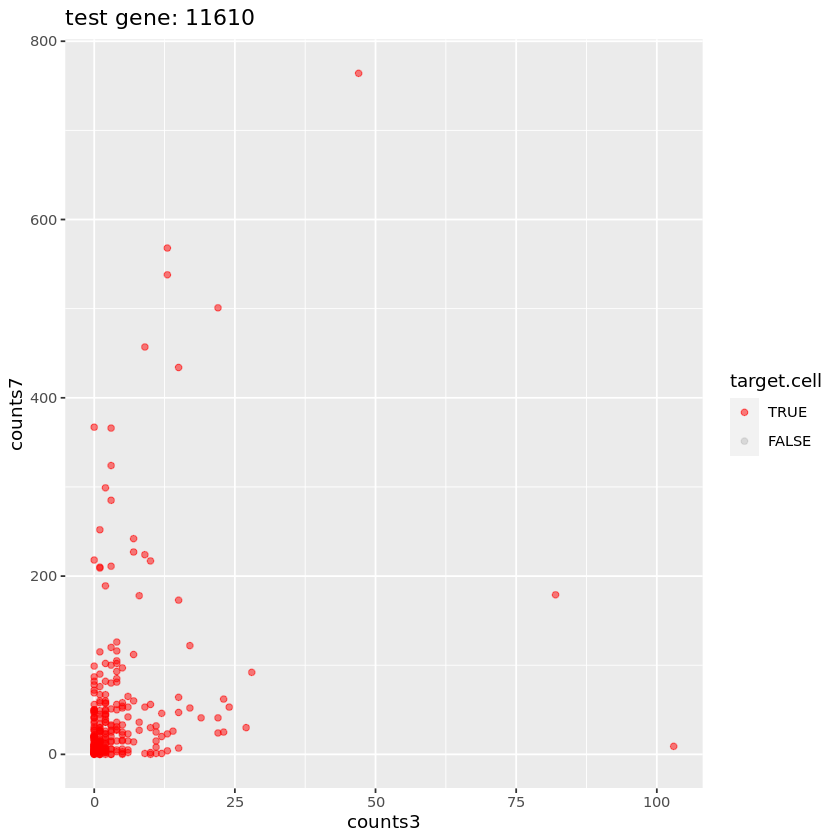

In [45]:
group.colors <- c(`TRUE` = "red", `FALSE` = "gray")

# ggplot(plotdf %>% filter(target.cell == TRUE),  aes(x = ix, y = counts, color = target.cell)) + 
#     geom_point(alpha=0.5) + 
#     facet_wrap(~effect.size, ncol = 1) + scale_color_manual(values = group.colors) + 
#     ggtitle(paste("test gene:", test.gene))

ggplot(plotdf %>% filter(target.cell == TRUE), 
       aes(x = counts3, y = counts7, color = target.cell)) + geom_point(alpha = 0.5) +
    scale_color_manual(values = group.colors) + 
    ggtitle(paste("test gene:", test.gene))

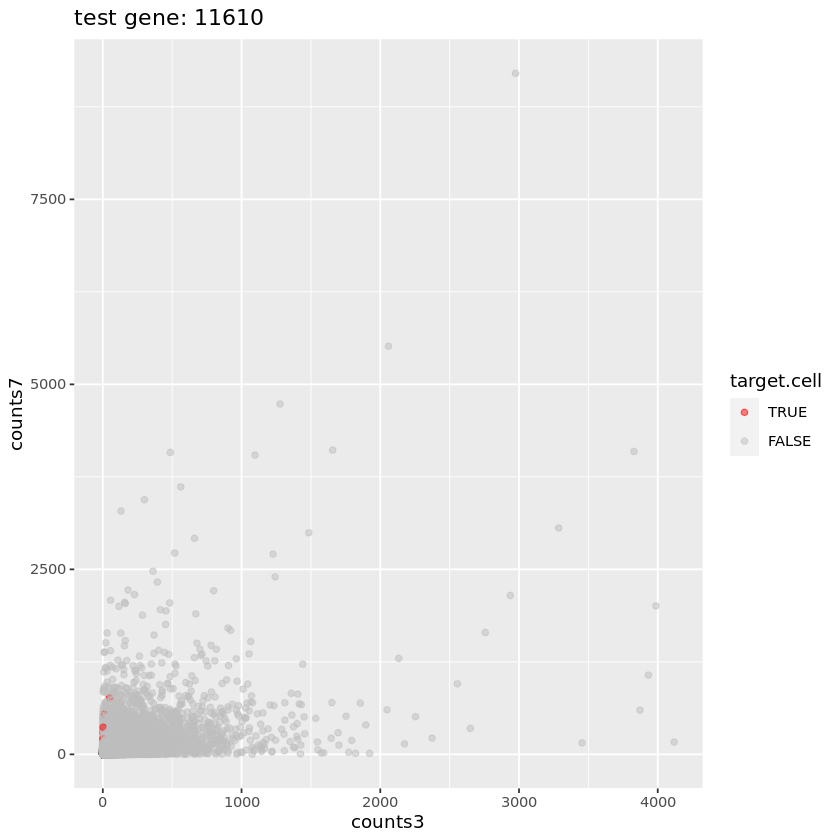

In [46]:
ggplot(plotdf, aes(x = counts3, y = counts7, color = target.cell)) + geom_point(alpha = 0.5) +
    scale_color_manual(values = group.colors) + 
    ggtitle(paste("test gene:", test.gene))

# Plot distributions of counts for groups of cells

- cells with no gRNAs
- cells with gRNA A
- cells with gRNA B
- cells with gRNA A+B

In [47]:
cells.ab <- which(xab.mtx[test.gene,]!=0)
cells.a.only <- which(xa.mtx[test.gene,]!=0 & xab.mtx[test.gene,]==0)
cells.b.only <- which(xb.mtx[test.gene,]!=0 & xab.mtx[test.gene,]==0)
cells.no.grnas <- which(xa.mtx[test.gene,]==0 & xb.mtx[test.gene,]==0)

In [48]:
all(sort(Reduce(union, list(cells.ab,
                   cells.a.only,
                   cells.b.only,
                   cells.no.grnas)))==1:50000)

[1] TRUE

In [49]:
length(size3.target.counts)

[1] 50000

In [50]:
distr.plotdf <- data.frame(counts3 = size3.target.counts,
                          counts7 = size7.target.counts)

In [51]:
distr.plotdf$group <- "no gRNAs"
distr.plotdf$group[cells.a.only] <- "A"
distr.plotdf$group[cells.b.only] <- "B"
distr.plotdf$group[cells.ab] <- "A+B"

In [64]:
distr.plotdf %>% tidyr::pivot_longer(-group, names_to = "effect size", values_to = "ncells")

group    effect size ncells
1      no gRNAs counts3     132   
2      no gRNAs counts7      69   
3      no gRNAs counts3     140   
4      no gRNAs counts7     577   
5      no gRNAs counts3      79   
6      no gRNAs counts7      32   
7      no gRNAs counts3      11   
8      no gRNAs counts7       8   
9      no gRNAs counts3      42   
10     no gRNAs counts7      14   
11     no gRNAs counts3      19   
12     no gRNAs counts7       9   
13     no gRNAs counts3       8   
14     no gRNAs counts7       8   
15     B        counts3       0   
16     B        counts7       2   
17     A        counts3      14   
18     A        counts7       8   
19     no gRNAs counts3       2   
20     no gRNAs counts7       5   
21     B        counts3       1   
22     B        counts7      22   
23     no gRNAs counts3      16   
24     no gRNAs counts7       9   
25     no gRNAs counts3       3   
26     no gRNAs counts7       6   
27     no gRNAs counts3      49   
28     no gRNAs counts7       0   
29     no gRNAs counts3     158   
30     no gRNAs counts7       3   
⋮      ⋮        ⋮           ⋮     
99971  no gRNAs counts3       1   
99972  no gRNAs counts7      30   
99973  no gRNAs counts3      13   
99974  no gRNAs counts7      33   
99975  B        counts3       0   
99976  B        counts7       0   
99977  no gRNAs counts3      69   
99978  no gRNAs counts7     105   
99979  no gRNAs counts3      11   
99980  no gRNAs counts7      11   
99981  A        counts3       2   
99982  A        counts7      52   
99983  no gRNAs counts3      49   
99984  no gRNAs counts7       9   
99985  no gRNAs counts3      57   
99986  no gRNAs counts7      41   
99987  no gRNAs counts3       4   
99988  no gRNAs counts7       3   
99989  no gRNAs counts3      96   
99990  no gRNAs counts7       3   
99991  no gRNAs counts3       7   
99992  no gRNAs counts7      41   
99993  no gRNAs counts3      66   
99994  no gRNAs counts7     122   
99995  no gRNAs counts3       4   
99996  no gRNAs counts7       8   
99997  no gRNAs counts3      74   
99998  no gRNAs counts7      50   
99999  no gRNAs counts3      10   
100000 no gRNAs counts7       4

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



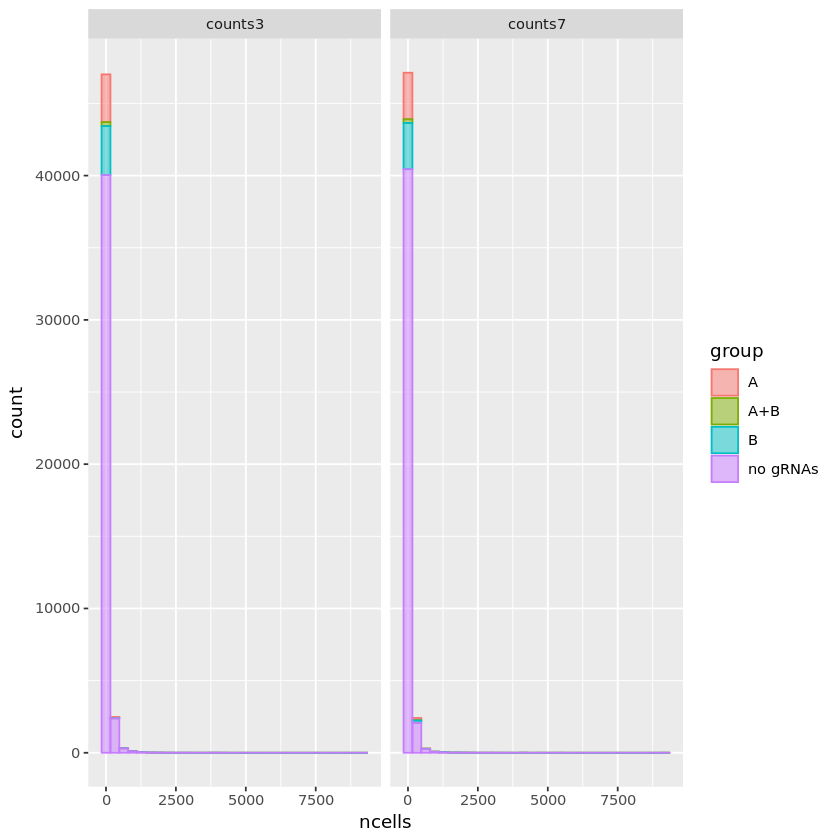

In [70]:
ggplot(distr.plotdf %>% tidyr::pivot_longer(-group, names_to = "effect.size", values_to = "ncells"), 
       aes(x = ncells, color = group, fill = group)) + geom_histogram(alpha = 0.5) + facet_wrap(~effect.size)

# Model

### $\beta_{AB}=3$

In [54]:
gene.data.size3 <- data.frame(tsA = xa.mtx[test.gene,],
                              tsB = xb.mtx[test.gene,],
                              tsAB = xab.mtx[test.gene,],
                              s.score = cell.cycle.scores$s.scores,
                              g2m.score = cell.cycle.scores$g2m.scores,
                              percent.mito = percent.mito,
                              counts = size3.target.counts,
                              scaling.factor = scaling.factors)

In [55]:
alt.size3 <- glm.nb(counts ~ tsA * tsB + s.score + g2m.score + percent.mito + offset(log(scaling.factor)),
                   data = gene.data.size3)


In [56]:
alt.size3.brm <- broom::tidy(alt.size3)

In [57]:
alt.size3.brm

term         estimate  std.error   statistic  p.value     
1 (Intercept)   6.399115 0.008190419  781.29279 0.000000e+00
2 tsA          -1.364090 0.027515386  -49.57554 0.000000e+00
3 tsB          -4.922436 0.034399473 -143.09626 0.000000e+00
4 s.score       3.551783 0.035360599  100.44466 0.000000e+00
5 g2m.score     4.247225 0.019865369  213.80044 0.000000e+00
6 percent.mito  3.763661 0.183728904   20.48486 2.938294e-93
7 tsA:tsB       3.188498 0.212583659   14.99879 7.476567e-51

### $\beta_{AB}=7$

In [58]:
gene.data.size7 <- data.frame(tsA = xa.mtx[test.gene,],
                              tsB = xb.mtx[test.gene,],
                              tsAB = xab.mtx[test.gene,],
                              s.score = cell.cycle.scores$s.scores,
                              g2m.score = cell.cycle.scores$g2m.scores,
                              percent.mito = percent.mito,
                              counts = size7.target.counts,
                              scaling.factor = scaling.factors)

In [59]:
alt.size7 <- glm.nb(counts ~ tsA * tsB + s.score + g2m.score + percent.mito + offset(log(scaling.factor)),
                   data = gene.data.size7)

In [60]:
alt.size7.brm <- broom::tidy(alt.size7)

In [61]:
alt.size7.brm

term         estimate    std.error   statistic   p.value     
1 (Intercept)   6.26439573 0.009653065 648.9540917 0.000000e+00
2 tsA          -0.02592576 0.031540270  -0.8219891 4.110831e-01
3 tsB           0.01867887 0.028178204   0.6628836 5.074051e-01
4 s.score       3.54983163 0.041456085  85.6287225 0.000000e+00
5 g2m.score     4.20679996 0.023396863 179.8018808 0.000000e+00
6 percent.mito  3.63132238 0.215741462  16.8318243 1.426388e-63
7 tsA:tsB       0.35358451 0.196052784   1.8035169 7.130707e-02

In [62]:
comparison.table %>% filter(gene == test.gene)

term         estimate_size3 std.error_size3 statistic_size3 p.value_size3
1 (Intercept)   6.429443      0.008097186      794.03425      0.000000e+00 
2 tsA          -1.357179      0.032884112      -41.27159      0.000000e+00 
3 tsB          -4.916676      0.041707486     -117.88474      0.000000e+00 
4 s.score       3.594049      0.035066212      102.49322      0.000000e+00 
5 g2m.score     4.262258      0.019715032      216.19330      0.000000e+00 
6 percent.mito  3.291824      0.182239935       18.06313      6.219076e-73 
7 tsA:tsB       3.578300      0.298951372       11.96950      5.133435e-33 
  gene  size_size3 estimate_size7 std.error_size7 statistic_size7 p.value_size7
1 11610 3           6.270693065   0.009684711     647.48377090    0.000000e+00 
2 11610 3           0.024025040   0.038095318       0.63065597    5.282655e-01 
3 11610 3          -0.003268269   0.034481183      -0.09478412    9.244863e-01 
4 11610 3           3.657686444   0.041785602      87.53461187    0.000000e+00 
5 11610 3           4.263167965   0.023583160     180.77169880    0.000000e+00 
6 11610 3           3.654211226   0.217438899      16.80569229    2.217089e-63 
7 11610 3           0.293312996   0.301171293       0.97390755    3.301024e-01 
  size_size7
1 7         
2 7         
3 7         
4 7         
5 7         
6 7         
7 7